In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import re

sns.set_theme(style="whitegrid")

,Spheres,Resolution,Time
0,1,400x400,0.040967
1,1,400x400,0.042850
2,1,400x400,0.039844
3,1,400x400,0.040956
4,1,400x400,0.040220
...,...,...,...
445,9,400x400,0.677014
446,9,400x400,0.687907
447,9,400x400,0.681578
448,9,400x400,0.732931


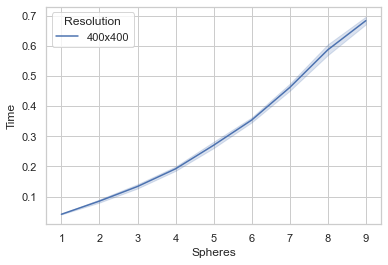

In [4]:
joined_files = os.path.join("CPU_*_400x400.csv")
joined_list = glob.glob(joined_files)
# tips2 = pd.read_csv('test1.csv')
tips2 = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
tips2.to_csv("CPU_400x400")
# tips2["Time"] = tips2["Time"].astype("double")
display(tips2)



ax = sns.lineplot(x="Spheres", y="Time", hue="Resolution", data=tips2)
# ax.set_yscale("log") # use log    

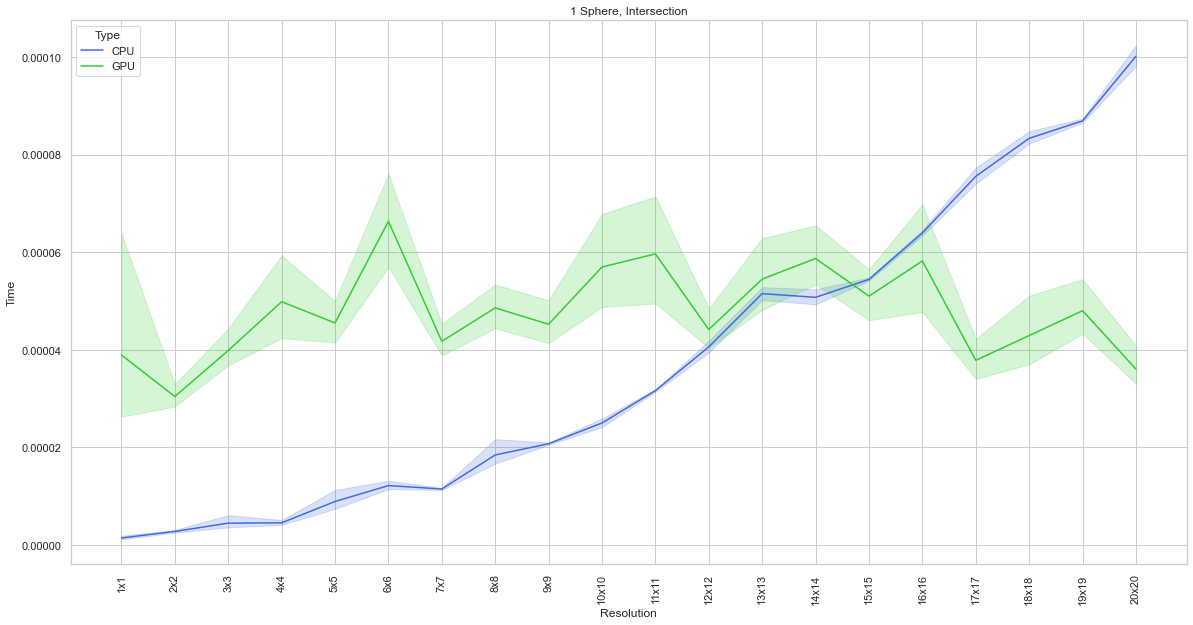

In [7]:
joined_files = os.path.join("CPU/1_sphere_1-1000/1-20/*.csv")
joined_files2 = os.path.join("GPU/1_sphere_1-1000/1-20/*.csv")
joined_list = sorted(glob.glob(joined_files))
joined_list2 = glob.glob(joined_files2)
# display(joined_list)
# tips2 = pd.read_csv('test1.csv')
CPU = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, joined_list2), ignore_index=True)


search = []    
for values in CPU['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
CPU['Width'] = search
CPU['Width'] = CPU['Width'].astype('int')
CPU = CPU.sort_values(["Width"], ascending=[True])
# display(CPU)
# tips2["Time"] = tips2["Time"].astype("double")
# display(tips2)
search2 = []    
for values in GPU['Resolution']:
    search2.append(re.search(r'(\d+)x', values).group(1))
GPU['Width'] = search2
GPU['Width'] = GPU['Width'].astype('int')
GPU = GPU.sort_values(["Width"], ascending=[True])

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Resolution", y="Time", data=CPU, hue='Type', color='r', palette={'CPU':'royalblue','GPU':'limegreen'})
ax = sns.lineplot(x="Resolution", y="Time", data=GPU, hue='Type', color='g', palette={'CPU':'royalblue','GPU':'limegreen'})

ax.set(title="1 Sphere, Intersection")

# ax.set_yscale("log") # use log
# plt.show()    
plt.xticks(rotation=90);

C:\Users\Tim Olsén\AppData\Local\Temp\ipykernel_4948\781012926.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GPU = GPU.append({'Spheres':1,'Resolution':'0x0','Time':0}, ignore_index=True)
C:\Users\Tim Olsén\AppData\Local\Temp\ipykernel_4948\781012926.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CPU = CPU.append({'Spheres':1,'Resolution':'0x0','Time':0}, ignore_index=True)


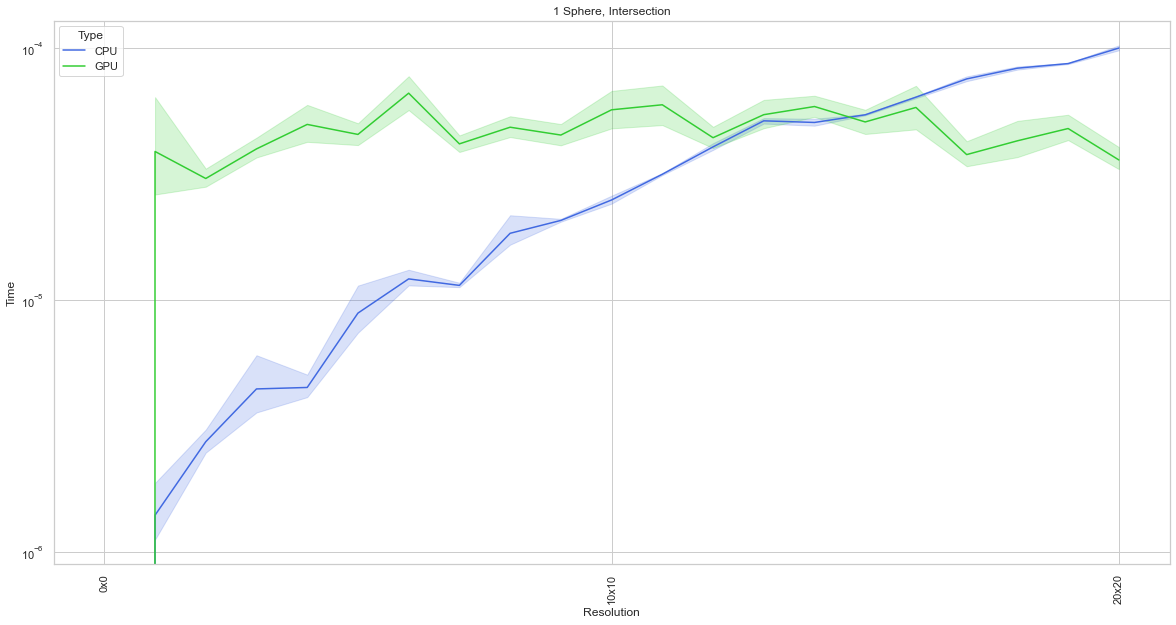

In [19]:
joined_files = os.path.join("CPU/1_sphere_1-1000/1-20/*.csv")
joined_files2 = os.path.join("GPU/1_sphere_1-1000/1-20/*.csv")
joined_list = sorted(glob.glob(joined_files))
joined_list2 = glob.glob(joined_files2)
# display(joined_list)
# tips2 = pd.read_csv('test1.csv')
CPU = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, joined_list2), ignore_index=True)


GPU = GPU.append({'Spheres':1,'Resolution':'0x0','Time':0}, ignore_index=True)
CPU = CPU.append({'Spheres':1,'Resolution':'0x0','Time':0}, ignore_index=True)

search = []    
for values in CPU['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
CPU['Width'] = search
CPU['Width'] = CPU['Width'].astype('int')
CPU = CPU.sort_values(["Width"], ascending=[True])
# display(CPU)
# tips2["Time"] = tips2["Time"].astype("double")



search2 = []    
for values in GPU['Resolution']:
    search2.append(re.search(r'(\d+)x', values).group(1))
GPU['Width'] = search2
GPU['Width'] = GPU['Width'].astype('int')
GPU = GPU.sort_values(["Width"], ascending=[True])

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'


plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Resolution", y="Time", data=CPU, hue='Type', color='r', palette={'CPU':'royalblue','GPU':'limegreen'})
ax = sns.lineplot(x="Resolution", y="Time", data=GPU, hue='Type', color='g', palette={'CPU':'royalblue','GPU':'limegreen'})

ax.set(title="1 Sphere, Intersection")
lennart = GPU["Resolution"].unique()[::10]
ax.set(xticks=lennart)


ax.set_yscale("log") # use log
# plt.show()    
plt.xticks(rotation=90);


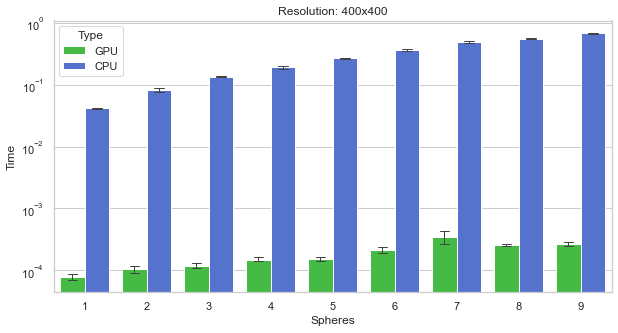

In [26]:
### ---CPU & GPU Bar CPU --- ###
    ### --- 400x400 --- ###

CPU_files = os.path.join("CPU/*_sphere_1-*/400_CPU_*_400x400.csv")
CPU_list = sorted(glob.glob(CPU_files))

GPU_files = os.path.join("GPU/*_sphere_1-*/400_GPU_*_400x400.csv")
GPU_list = sorted(glob.glob(GPU_files))

CPU = pd.concat(map(pd.read_csv, CPU_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, GPU_list), ignore_index=True)

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

plot = pd.concat([GPU, CPU])

plt.figure(figsize=(10,5))

pal = sns.set_palette("muted")

ax = sns.barplot(x="Spheres", y="Time", hue='Type', data=plot, palette={'CPU':'royalblue','GPU':'limegreen'}, errwidth=1, capsize=0.15)
# ax = sns.lineplot(x="Spheres", y="Time", hue='Type', data=GPU, palette={'CPU':'red','GPU':'green'})
ax.set(title="Resolution: 400x400")

ax.set_yscale("log") # use log
# plt.savefig("rövhål.png", dpi=400)